In [8]:
import torch
from torch import nn
from torchvision.transforms.functional import to_tensor
from matplotlib import pyplot as plt

import os
from PIL import Image
from pathlib import Path

from DBCNN import DBCNN

In [9]:
options = {'fc': True}
scnn_root = os.path.join('pretrained_scnn','scnn.pkl')

In [10]:
options['cayley'] = False
options['cayley2'] = False
ckpt = torch.load(os.path.join('DBCNN-cayley=False-cayley2=False-cayley3=False.pt'))
model = nn.DataParallel(DBCNN(scnn_root, options), device_ids=[0]).cuda()
model_name = type(model).__name__
model.load_state_dict(ckpt['model'])
print(model)

/tmp/ipykernel_3812613/2480940744.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join('DBCNN-cayley=False-cayley2=False-cayley3=False.pt'))
/m

DataParallel(
  (module): DBCNN(
    (features1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
   

/mnt/ssd2/28i_mel/VG_Architectural_Adversarial_Robustness/DBCNN.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  scnn.load_state_dict(torch.load(scnn_root))


In [11]:
def get_lips(model, x, idx):
    # idx = len(model.module.features1)-2
    inpt = x.clone()
    out = x.clone()
    for i, module in enumerate(model.module.features1):
        out = module(inpt)
        if i==idx:
            # print(module)
            return (torch.norm(out)/torch.norm(inpt)).detach().cpu().numpy()
        inpt = out

In [12]:
nips_path = os.path.join('dataset', 'NIPS')
nips = Path(nips_path).iterdir()

lipsS = []
idx = len(model.module.features1) - 2
for img_name in nips:
    x = to_tensor(Image.open(img_name).convert("RGB")).cuda()
    lipsS.append(get_lips(model, x, idx))

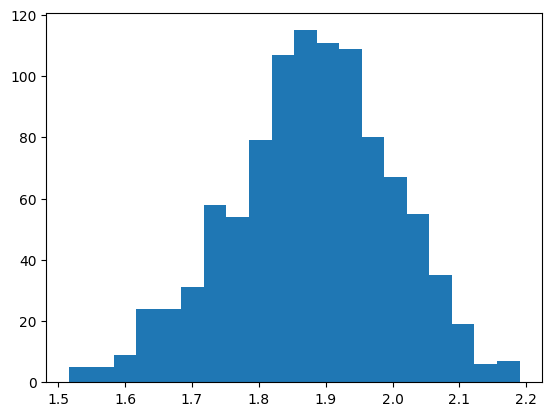

In [13]:
plt.hist(lipsS, bins=20)
plt.show()

In [14]:
options['cayley'] = True
options['cayley2'] = False
ckpt_cayley = torch.load(os.path.join('DBCNN-cayley=True-cayley2=False-cayley3=False.pt'))
model_cayley = nn.DataParallel(DBCNN(scnn_root, options), device_ids=[0]).cuda()
model_cayley_name = type(model_cayley).__name__
model_cayley.load_state_dict(ckpt_cayley['model'])
print(model_cayley)

/tmp/ipykernel_3812613/3933166545.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt_cayley = torch.load(os.path.join('DBCNN-cayley=True-cayley2=False-cayley3=False.pt

/mnt/ssd2/28i_mel/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/mnt/ssd2/28i_mel/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DataParallel(
  (module): DBCNN(
    (features1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
   

/mnt/ssd2/28i_mel/VG_Architectural_Adversarial_Robustness/DBCNN.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  scnn.load_state_dict(torch.load(scnn_root))


In [15]:
nips_path = os.path.join('dataset', 'NIPS')
nips = Path(nips_path).iterdir()

lipsS_cayley = []
idx = len(model_cayley.module.features1) - 2
for img_name in nips:
    x = to_tensor(Image.open(img_name).convert("RGB")).unsqueeze(0).cuda()
    lipsS_cayley.append(get_lips(model_cayley, x, idx))

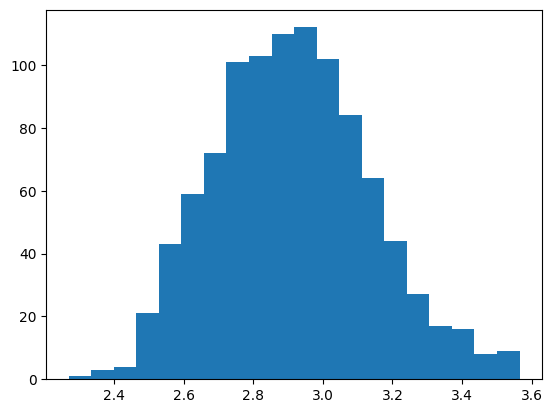

In [16]:
plt.hist(lipsS_cayley, bins=20)
plt.show()

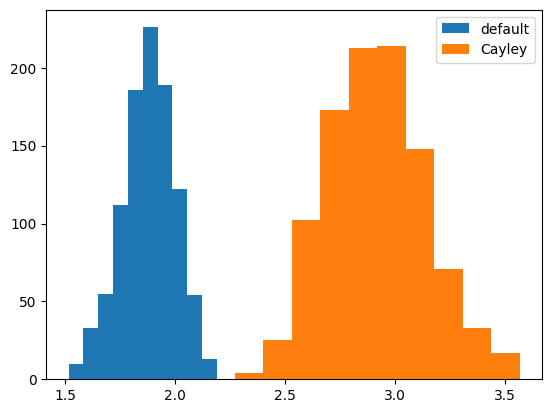

In [17]:
plt.hist(lipsS, label='default')
plt.hist(lipsS_cayley, label='Cayley')
plt.legend()
plt.show()

In [18]:
options['cayley'] = False
options['cayley2'] = True
ckpt_cayley2 = torch.load(os.path.join('DBCNN-cayley=False-cayley2=True-cayley3=False.pt'))
model_cayley2 = nn.DataParallel(DBCNN(scnn_root, options), device_ids=[0]).cuda()
model_cayley2_name = type(model_cayley2).__name__
model_cayley2.load_state_dict(ckpt_cayley2['model'])
print(model_cayley2)

/tmp/ipykernel_3812613/2927322129.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt_cayley2 = torch.load(os.path.join('DBCNN-cayley=False-cayley2=True-cayley3=False.p

DataParallel(
  (module): DBCNN(
    (features1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
   

In [19]:
nips_path = os.path.join('dataset', 'NIPS')
nips = Path(nips_path).iterdir()

lipsS_cayley2 = []
idx = len(model_cayley2.module.features1) - 2
for img_name in nips:
    x = to_tensor(Image.open(img_name).convert("RGB")).unsqueeze(0).cuda()
    lipsS_cayley2.append(get_lips(model_cayley2, x, idx))

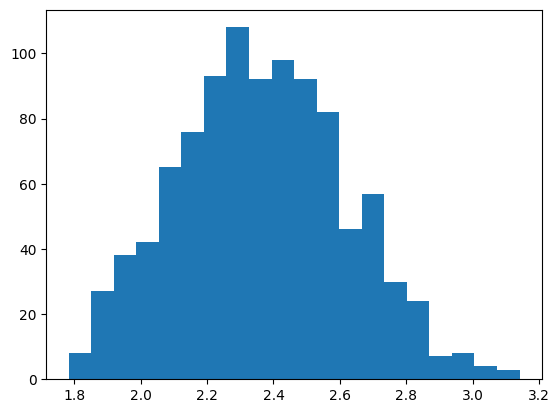

In [20]:
plt.hist(lipsS_cayley2, bins=20)
plt.show()

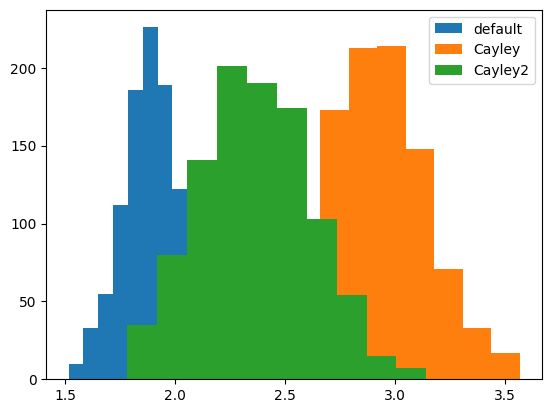

In [21]:
plt.hist(lipsS, label='default', bins=20)
plt.hist(lipsS_cayley, label='Cayley', bins=20)
plt.hist(lipsS_cayley2, label='Cayley2', bins=20)
plt.legend()
plt.show()